<h3>Objetivo: Consumir dados meteorológicos via API, preparar os dados, treinar um modelo e prever quais serão as próximas temperaturas médias.</h3>

<p>Atenção</p>

<p>1. Todos os dados apresentados na predição foram consumidos via API Open-Meteo que pode ser acessada nas referências do projeto.</p>

<p>2. Esse foi o meu primeiro projeto de predição de dados, sendo assim, caso encontre algum ponto de melhoria, por favor, não esqueça de sinalizar.</p>

<p>Referências utilizadas para desenvolvimento da análise</p>

<a style="color:lightgrey" href="https://pandas.pydata.org/docs/reference/general_functions.html">1. Tratando dados com pandas</a>

<a style="color:lightgrey" href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html">2. Visualizando dados com matplolib</a>

<a style="color:lightgrey" href="https://open-meteo.com/en/docs">3. API Open-mateo</a>

<p>Documentação dos atributos, datatypes, descrição e exemplo dos dados presentes na base de dados</p>
<table>
      <tr>
          <td>atributo</td>
          <td>tipo de dado</td>
          <td>descrição</td>
          <td>exemplo</td>
      </tr>
      <tr>
          <td>weathercode</td>
          <td>int</td>
          <td>a condição climática mais severa em um determinado dia</td>
          <td>63</td>
      </tr>
      <tr>
          <td>temperature_2m_max</td>
          <td>float</td>
          <td>temperatura diária máxima do ar a 2 metros acima do solo</td>
          <td>25.4</td>
      </tr>
      <tr>
          <td>temperature_2m_min</td>
          <td>float</td>
          <td>temperatura diária mínima do ar a 2 metros acima do solo</td>
          <td>19.0</td>
      </tr>
      <tr>
          <td>temperature_2m_mean</td>
          <td>float</td>
          <td>temperatura diária média do ar a 2 metros acima do solo</td>
          <td>21.7</td>
      </tr>
      <tr>
          <td>apparent_temperature_max</td>
          <td>float</td>
          <td>temperatura máxima aparente diária</td>
          <td>31.8</td>
      </tr>
      <tr>
          <td>apparent_temperature_min</td>
          <td>float</td>
          <td>temperatura mínima aparente diária</td>
          <td>21.5</td>
      </tr>
      <tr>
          <td>apparent_temperature_mean</td>
          <td>float</td>
          <td>temperatura média aparente diária</td>
          <td>24.8</td>
      </tr>
      <tr>
          <td>sunrise</td>
          <td>object</td>
          <td>nascer do sol</td>
          <td>2023-01-01T05:22</td>
      </tr>
      <tr>
          <td>sunset</td>
          <td>object</td>
          <td>por do sol</td>
          <td>2023-01-01T18:58</td>
      </tr>
      <tr>
          <td>shortwave_radiation_sum</td>
          <td>float</td>
          <td>a soma da radiação solar em um determinado dia em megajoules</td>
          <td>22.54</td>
      </tr>
      <tr>
          <td>precipitation_sum</td>
          <td>float</td>
          <td>soma da precipitação diária (incluindo chuva, aguaceiros e queda de neve)</td>
          <td>8.2</td>
      </tr>
      <tr>
          <td>rain_sum</td>
          <td>float</td>
          <td>soma da chuva diária</td>
          <td>8.2</td>
      </tr>
      <tr>
          <td>snowfall_sum</td>
          <td>float</td>
          <td>soma da neve diária</td>
          <td>0.0</td>
      </tr>
      <tr>
          <td>precipitation_hours</td>
          <td>float</td>
          <td>horas de precipitação</td>
          <td>10.0</td>
      </tr>
      <tr>
          <td>windspeed_10m_max</td>
          <td>float</td>
          <td>velocidade máxima dos ventos em um dia</td>
          <td>10.5</td>
      </tr>
      <tr>
          <td>windgusts_10m_max</td>
          <td>float</td>
          <td>velocidade máxima das rajadas em um dia</td>
          <td>27.4</td>
      </tr>
      <tr>
          <td>winddirection_10m_dominant</td>
          <td>int</td>
          <td>direção dominante do vento</td>
          <td>95</td>
      </tr>
      <tr>
          <td>et0_fao_evapotranspiration</td>
          <td>float</td>
          <td>soma diária de ET₀ Evapotranspiração de referência de um gramado bem regado</td>
          <td>4.18</td>
      </tr>
</table>

<p>Importando as bibliotecas para consumo via API, análise, tratamento, predição e visualização de dados</p>

In [33]:
import requests
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

<p>Utilizando o módulo requests para consultar os dados via API</p>

In [34]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=-23.55&longitude=-46.64&start_date=2022-01-01&end_date=2022-12-31&daily=weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration&timezone=America%2FSao_Paulo")
response = response.text

<p>Realizando a leitura dos dados com o método read_json e visualizando as colunas da base de dados</p>

In [35]:
source = pd.read_json(response)
source.index

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration'],
      dtype='object')

<p>Separação das colunas em series que irão compor o dataframe</p>

In [36]:
for i in range(len(source['daily'])):
  if i == 0:
    time = pd.Series(source['daily'][i])
  elif i == 1:
    weathercode = pd.Series(source['daily'][i])
  elif i == 2:
    temperature_2m_max = pd.Series(source['daily'][i])
  elif i == 3:
    temperature_2m_min = pd.Series(source['daily'][i])
  elif i == 4:
    temperature_2m_mean = pd.Series(source['daily'][i])
  elif i == 5:
    apparent_temperature_max = pd.Series(source['daily'][i])
  elif i == 6:
    apparent_temperature_min = pd.Series(source['daily'][i])
  elif i == 7:
    apparent_temperature_mean = pd.Series(source['daily'][i])
  elif i == 8:
    sunrise = pd.Series(source['daily'][i])
  elif i == 9:
    sunset = pd.Series(source['daily'][i])
  elif i == 10:
    shortwave_radiation_sum = pd.Series(source['daily'][i])
  elif i == 11:
    precipitation_sum = pd.Series(source['daily'][i])
  elif i == 12:
    rain_sum = pd.Series(source['daily'][i])
  elif i == 13:
    snowfall_sum = pd.Series(source['daily'][i])
  elif i == 14:
    precipitation_hours = pd.Series(source['daily'][i])
  elif i == 15:
    windspeed_10m_max = pd.Series(source['daily'][i])
  elif i == 16:
    windgusts_10m_max = pd.Series(source['daily'][i])
  elif i == 17:
    winddirection_10m_dominant = pd.Series(source['daily'][i])
  elif i == 18:
    et0_fao_evapotranspiration = pd.Series(source['daily'][i])
  else:
    pass

<p>Concatenação das series para construção do dataframe</p>

In [37]:
data = pd.concat({'time': time,
              'weathercode': weathercode,
              'temperature_2m_max': temperature_2m_max,
              'temperature_2m_min': temperature_2m_min,
              'temperature_2m_mean': temperature_2m_mean,
              'apparent_temperature_max': apparent_temperature_max,
              'apparent_temperature_min': apparent_temperature_min,
              'apparent_temperature_mean': apparent_temperature_mean,
              'sunrise': sunrise,
              'sunset': sunset,
              'shortwave_radiation_sum': shortwave_radiation_sum,
              'precipitation_sum': precipitation_sum,
              'rain_sum': rain_sum,
              'snowfall_sum': snowfall_sum,
              'precipitation_hours': precipitation_hours,
              'windspeed_10m_max': windspeed_10m_max,
              'windgusts_10m_max': windgusts_10m_max,
              'winddirection_10m_dominant': winddirection_10m_dominant,
              'et0_fao_evapotranspiration': et0_fao_evapotranspiration}, axis=1)

data.head(5)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2022-01-01,63,25.8,19.2,22.1,29.6,21.8,24.7,2022-01-01T05:22,2022-01-01T18:58,18.28,8.9,8.9,0.0,11.0,15.7,39.2,4,3.60
1,2022-01-02,63,26.3,19.2,22.8,29.6,21.4,25.4,2022-01-02T05:23,2022-01-02T18:58,20.66,7.6,7.6,0.0,6.0,14.5,33.8,105,3.92
2,2022-01-03,63,25.5,20.2,22.7,28.8,22.8,25.9,2022-01-03T05:23,2022-01-03T18:58,16.38,20.5,20.5,0.0,15.0,9.9,24.8,38,3.18
3,2022-01-04,65,26.9,20.7,23.2,30.0,22.9,25.7,2022-01-04T05:24,2022-01-04T18:58,18.44,21.8,21.8,0.0,19.0,18.6,48.2,98,3.63
4,2022-01-05,61,26.4,20.9,22.5,29.4,21.8,24.1,2022-01-05T05:25,2022-01-05T18:59,11.63,9.5,9.5,0.0,21.0,26.9,43.2,127,2.28


<p>Utilização do método ols para definir o modelo de regressão linear múltipla, onde teremos: y = a0 + b1x1 + ... + bNxN, onde: y, representa a variável dependente, nesse caso a temperatura média prevista; a0, representa o intercepto; bN, o coeficiente da variável independente; xN, representa a variável independente</p>

In [38]:
model = sm.ols(formula='temperature_2m_mean ~ weathercode + temperature_2m_max + temperature_2m_min + apparent_temperature_max + apparent_temperature_min + apparent_temperature_mean + shortwave_radiation_sum + precipitation_sum + rain_sum + snowfall_sum + precipitation_hours + windspeed_10m_max + windgusts_10m_max + winddirection_10m_dominant + et0_fao_evapotranspiration', data = data)

<p>Aplicação do método fit para realizar os ajustes dos parâmetros do modelo</p>

In [39]:
model = model.fit()

<p>Apresentação dos resultados do modelo</p>

In [40]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_2m_mean   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 1.037e+04
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:15:17   Log-Likelihood:                 137.56
No. Observations:                  365   AIC:                            -247.1
Df Residuals:                      351   BIC:                            -192.5
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

<p>O valor do r-squared é alto, o que nos mostra que os dados podem ser representados por uma função linear, ou seja, o modelo de regressão linear múltipla poderá ser usado para prever os valores</p> 
<p>Os p-values são baixos, o que indica que as variáveis independentes (xN) influenciam fortemente o valor da variável dependente (y), dessa forma, manteremos as variáveis independentes que possuem p-value <= 0.05</p>
<p>Para otimizar o modelo, além de filtrar os p-values <= 0.05, iremos selecionar apenas as variáveis que se aplicam ao clima de São Paulo, desse modo, iremos retirar informações atreladas a neve, por exemplo</p>

In [41]:
model = sm.ols(formula='temperature_2m_mean ~ weathercode + temperature_2m_max + temperature_2m_min + apparent_temperature_max + apparent_temperature_min + apparent_temperature_mean + shortwave_radiation_sum + windspeed_10m_max + et0_fao_evapotranspiration', data = data)

<p>Aplicação do método fit para realizar os ajustes dos parâmetros do modelo</p>

In [42]:
model = model.fit()

<p>Apresentando os resultados do novo modelo para serem analisados</p>

In [43]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_2m_mean   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 1.498e+04
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                         22:15:17   Log-Likelihood:                 135.51
No. Observations:                  365   AIC:                            -251.0
Df Residuals:                      355   BIC:                            -212.0
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

<p>Com o segundo treinamento realizado, mantemos apenas as variáveis independentes (x) que de fato geram influencia no valor da variável dependente (y)</p>
<p>Além disso, notamos que o R-squared do modelo não sofreu nenhuma alteração, o que nos mostra que o conjunto de dados ainda pode ser fortemente explicado por uma função linear, nesse caso:</p>
<p>temperatura_estimada = 2.1661 + -0.0012*weathercode + 0.2223*temperature_2m_max + 0.3495*temperature_2m_min + -0.1560*apparent_temperature_max + -0.2335*apparent_temperature_min + 0.6591*apparent_temperature_mean + -0.0562*shortwave_radiation_sum + 0.0251*windspeed_10m_max + 0.4257*et0_fao_evapotranspiration</p>

<p>Com o segundo treinamento, é necessário buscar os valores das variáveis independentes (x), dessa forma, utilizaremos o módulo requests para consultar os dados via APAI que serão previstos</p>

In [44]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=-23.55&longitude=-46.64&start_date=2023-01-01&end_date=2023-01-07&daily=weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration&timezone=America%2FSao_Paulo")
response = response.text

<p>Realizando a leitura dos dados com o método read_json e visualizando as colunas da base de dados</p>

In [45]:
source = pd.read_json(response)
source.index

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration'],
      dtype='object')

<p>Aplicando a função linear para prever as temperaturas médias (y) do período 01/01/2023 à 07/01/2023. Para isso criamos uma lista, capturamos os valores das variáveis independentes e aplicamos a função linear. Por fim, salvamos os as predições em uma lista para comparar com a lista de dados reais</p>

In [46]:
temperaturas_estimadas = list()

for i in range(0,7):
  weathercode = source['daily']['weathercode'][i]
  temperature_2m_max = source['daily']['temperature_2m_max'][i]
  temperature_2m_min = source['daily']['temperature_2m_min'][i]
  apparent_temperature_max = source['daily']['apparent_temperature_max'][i]
  apparent_temperature_min = source['daily']['apparent_temperature_min'][i]
  apparent_temperature_mean = source['daily']['apparent_temperature_mean'][i]
  shortwave_radiation_sum = source['daily']['shortwave_radiation_sum'][i]
  windspeed_10m_max = source['daily']['windspeed_10m_max'][i]
  et0_fao_evapotranspiration = source['daily']['et0_fao_evapotranspiration'][i]

  temperatura_estimada = 2.1661 + -0.0012*weathercode + 0.2223*temperature_2m_max + 0.3495*temperature_2m_min + -0.1560*apparent_temperature_max + -0.2335*apparent_temperature_min + 0.6591*apparent_temperature_mean + -0.0562*shortwave_radiation_sum + 0.0251*windspeed_10m_max + 0.4257*et0_fao_evapotranspiration
  
  temperaturas_estimadas.append(round(temperatura_estimada,2))

<p>Apresentação dos dados previstos pela função linear para o período de 01/01/2023 à 07/01/2023</p>

In [47]:
print(f'Temperaturas médias estimadas pelo modelo {temperaturas_estimadas}')

Temperaturas médias estimadas pelo modelo [21.52, 22.61, 22.62, 20.63, 17.32, 17.49, 17.37]


<p>Apresentação dos dados capturados via API para o período de 01/01/2023 à 07/01/2023</p>

In [48]:
temperaturas_reais = source["daily"]["temperature_2m_mean"]
print(f'Temperaturas médias reais {temperaturas_reais}')

Temperaturas médias reais [21.7, 22.7, 22.7, 20.7, 17.3, 17.7, 17.5]


<p>Comparando a temperatura média prevista e a temperatura média real para o período de 01/01/2023 à 07/01/2023</p>

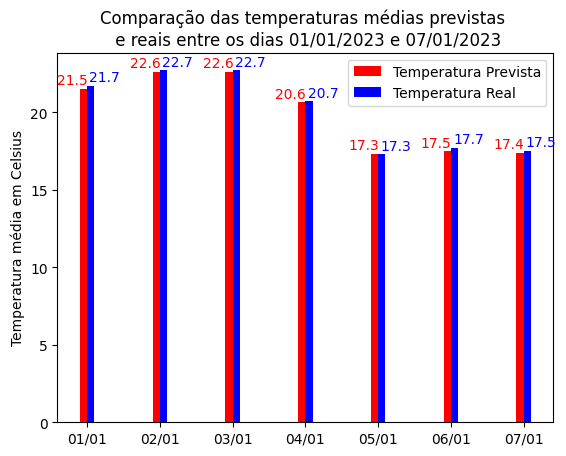

In [49]:
n = 7

largura = 0.1

ind = np.arange(n)

fig, ax = plt.subplots()
barras1 = ax.bar(ind, temperaturas_estimadas, largura, color='r')
barras2 = ax.bar(ind + largura, temperaturas_reais, largura, color='b')

ax.set_ylabel('Temperatura média em Celsius')
ax.set_title('Comparação das temperaturas médias previstas \n e reais entre os dias 01/01/2023 e 07/01/2023')
ax.set_xticks(ind + largura / 2)
ax.set_xticklabels(('01/01', '02/01', '03/01', '04/01', '05/01', '06/01', "07/01"))
ax.legend((barras1[0], barras2[0]), ('Temperatura Prevista', 'Temperatura Real'))

for barra in (barras1):
    altura = barra.get_height()
    plt.annotate(f'{altura:.1f}', xy=(barra.get_x() + barra.get_width() / 2, altura), xytext=(-8, 1),
                textcoords="offset points", ha='center', va='bottom', color='r')

for barra in (barras2):
    altura = barra.get_height()
    plt.annotate(f'{altura:.1f}', xy=(barra.get_x() + barra.get_width() / 2, altura), xytext=(10, 1),
                textcoords="offset points", ha='center', va='bottom', color='b')

plt.show()

<p>Conforme o gráfico apresentado acima, concluímos que o modelo apresenta resultados aceitáveis, pois quando comparamos as temperaturas médias previstas com as temperaturas médias reais, os maiores erros apresentados são de aproximadamente 0.2°C</p>